In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Create sample data
data = {
    'height': [160, 165, 170, 175, 180, 185, 190, 195, 200, 205],
    'weight': [40, 90, 95, 45, 92, 97, 54, 57, 80, 45],
    'class': ['underweight', 'normal', 'normal', 'underweight', 'normal', 'normal', 'underweight', 'underweight', 'normal', 'underweight']
}

df = pd.DataFrame(data)


X = df[['height', 'weight']]
y = df['class']


y = y.map({'underweight': 0, 'normal': 1})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train a Logistic Regression model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model (optional but recommended)
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

# Example prediction: Predict the class for a new data point (height=160, weight=52)
new_data = np.array([[160, 52]])
prediction = model.predict(new_data)

# Convert the numerical prediction back to the original class label
predicted_class = 'normal' if prediction[0] == 1 else 'underweight'

print(f"Prediction for height 160, weight 52: {predicted_class}")




Model accuracy: 0.67
Prediction for height 160, weight 52: underweight


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Training time: 0.0245 seconds
Model accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3


Confusion Matrix:
[[0 0]
 [1 2]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


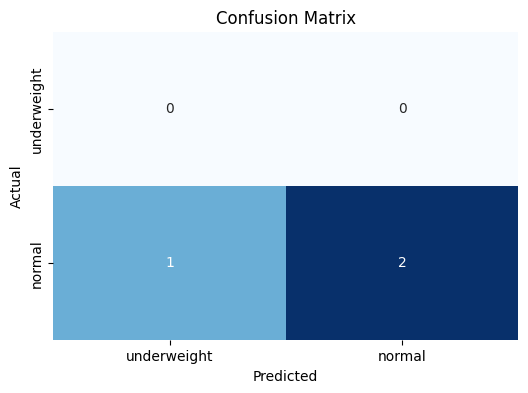

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


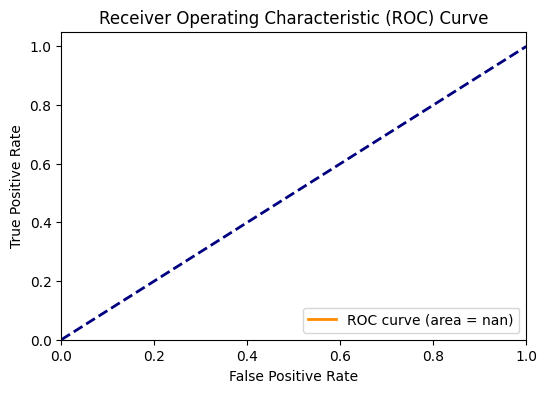

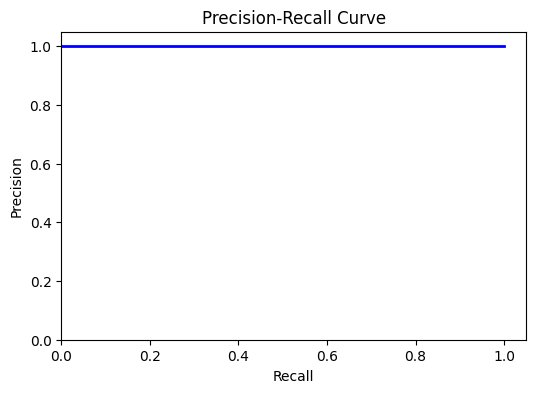

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Prediction time for one sample: 0.00083733 seconds
Prediction for height 160, weight 52: underweight


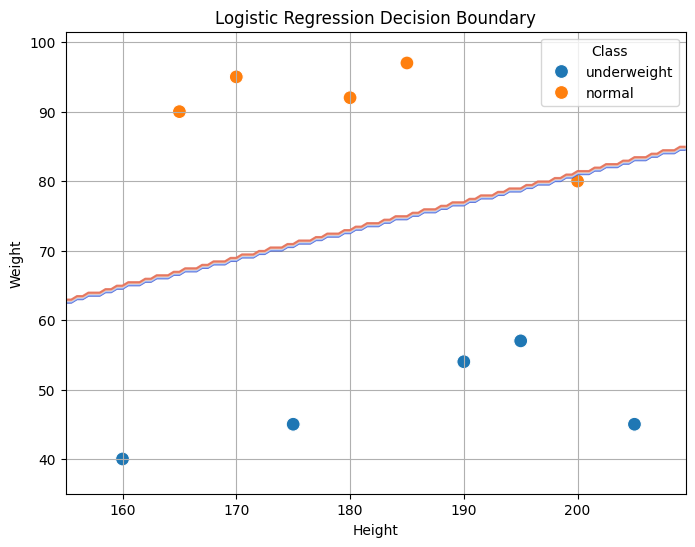

In [8]:


import time
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Start timer for training
start_time = time.time()

# Build and train a Logistic Regression model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# End timer for training
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

# Get predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['underweight', 'normal'], yticklabels=['underweight', 'normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.show()

# Example prediction: Predict the class for a new data point (height=160, weight=52)
new_data = np.array([[160, 52]])

# Start timer for prediction
start_time_pred = time.time()
prediction = model.predict(new_data)
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred
print(f"\nPrediction time for one sample: {prediction_time:.8f} seconds")


# Convert the numerical prediction back to the original class label
predicted_class = 'normal' if prediction[0] == 1 else 'underweight'

print(f"Prediction for height 160, weight 52: {predicted_class}")

# Plot the data points with different colors for each class
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='height', y='weight', hue='class', s=100)

# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
h = .5  # step size in the mesh
x_min, x_max = X['height'].min() - 5, X['height'].max() + 5
y_min, y_max = X['weight'].min() - 5, X['weight'].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour line representing the decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Logistic Regression Decision Boundary')
plt.legend(title='Class')
plt.grid(True)
plt.show()



Decision Tree Training time: 0.0219 seconds
Decision Tree Model accuracy: 1.00

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Decision Tree Confusion Matrix:
[[3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


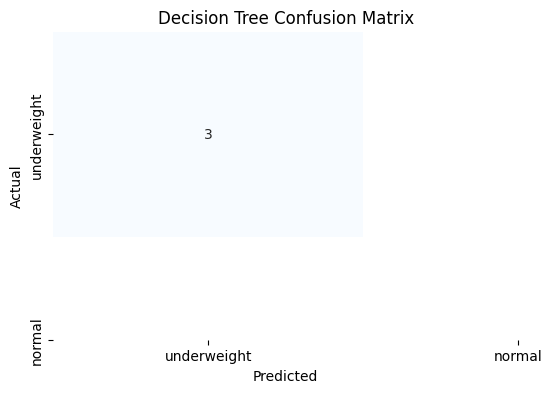

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


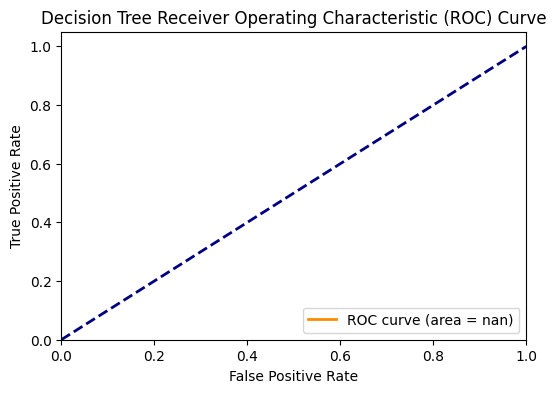

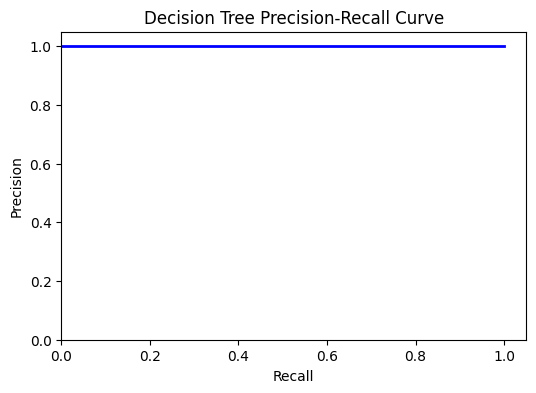

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Decision Tree Prediction time for one sample: 0.00111723 seconds
Decision Tree Prediction for height 160, weight 52: underweight


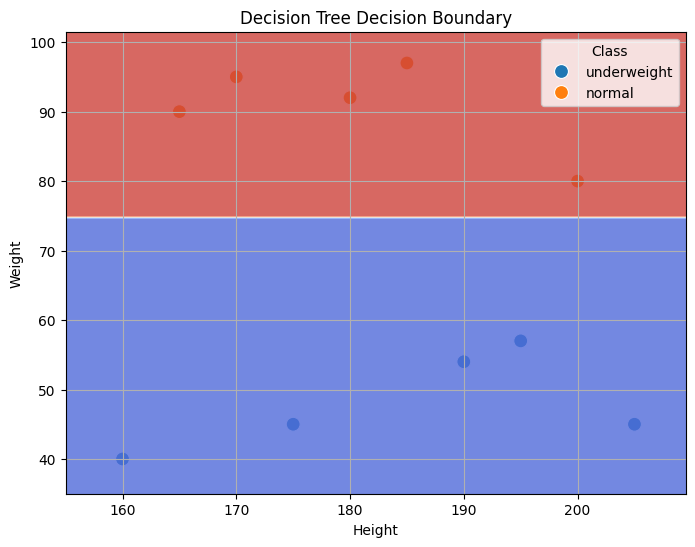


--- Model Comparison ---
Logistic Regression Accuracy: 0.67
Decision Tree Accuracy: 1.00
Logistic Regression Training Time: 0.0245 seconds
Decision Tree Training Time: 0.0219 seconds
Logistic Regression Prediction Time (single sample): 0.00083733 seconds
Decision Tree Prediction Time (single sample): 0.00111723 seconds


In [13]:
# compare the developed model with any 1 other ML model for the performance comaprision do it correctly

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Build and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Start timer for training
start_time_dt = time.time()
dt_model.fit(X_train, y_train)
end_time_dt = time.time()
training_time_dt = end_time_dt - start_time_dt
print(f"\nDecision Tree Training time: {training_time_dt:.4f} seconds")

# Evaluate the Decision Tree model
score_dt = dt_model.score(X_test, y_test)
print(f"Decision Tree Model accuracy: {score_dt:.2f}")

# Get predictions on the test set
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Classification Report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nDecision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['underweight', 'normal'], yticklabels=['underweight', 'normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)

plt.figure(figsize=(6, 4))
plt.plot(recall_dt, precision_dt, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.show()

# Example prediction with Decision Tree: Predict the class for a new data point (height=160, weight=52)
new_data = np.array([[160, 52]])

# Start timer for prediction
start_time_pred_dt = time.time()
prediction_dt = dt_model.predict(new_data)
end_time_pred_dt = time.time()
prediction_time_dt = end_time_pred_dt - start_time_pred_dt
print(f"\nDecision Tree Prediction time for one sample: {prediction_time_dt:.8f} seconds")

# Convert the numerical prediction back to the original class label
predicted_class_dt = 'normal' if prediction_dt[0] == 1 else 'underweight'

print(f"Decision Tree Prediction for height 160, weight 52: {predicted_class_dt}")


# Plot the data points with different colors for each class
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='height', y='weight', hue='class', s=100)

# Plot the decision boundary for Decision Tree
# Create a meshgrid of points to plot the decision boundary
h = .5  # step size in the mesh
x_min, x_max = X['height'].min() - 5, X['height'].max() + 5
y_min, y_max = X['weight'].min() - 5, X['weight'].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
Z_dt = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_dt = Z_dt.reshape(xx.shape)

# Plot the contour line representing the decision boundary
plt.contourf(xx, yy, Z_dt, cmap=plt.cm.coolwarm, alpha=0.8)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Tree Decision Boundary')
plt.legend(title='Class')
plt.grid(True)
plt.show()

print("\n--- Model Comparison ---")
print(f"Logistic Regression Accuracy: {score:.2f}")
print(f"Decision Tree Accuracy: {score_dt:.2f}")
print(f"Logistic Regression Training Time: {training_time:.4f} seconds")
print(f"Decision Tree Training Time: {training_time_dt:.4f} seconds")
print(f"Logistic Regression Prediction Time (single sample): {prediction_time:.8f} seconds")
print(f"Decision Tree Prediction Time (single sample): {prediction_time_dt:.8f} seconds")
